2.1 Nạp ảnh sử dụng thư viện Python Image Library (PIL)

In [1]:
from PIL import Image
import numpy as np
img = Image.open("bird.png")
img.show()

2.2 Nạp ảnh sử dụng lệnh thư viện imageio

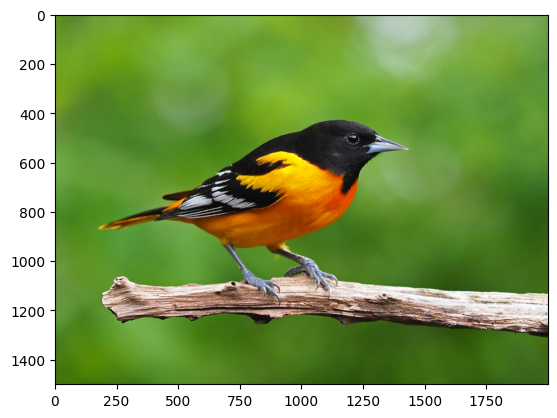

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread("bird.png")
plt.imshow(data)
plt.show()

2.3 Độ phân giải ảnh

Viết chương trình nạp ảnh màu và chuyển sang ảnh grayscale

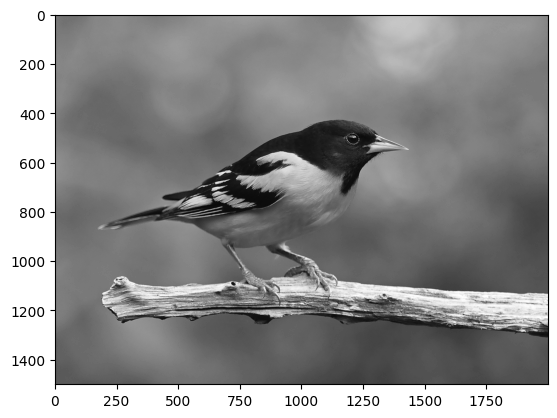

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread("bird.png", mode='F')
plt.imshow(data, cmap='gray')
plt.show()


Viết chương trình nạp ảnh grayscale và giảm 4 bit thấp, giữ 4 bit cao. Lưu ảnh với tên là birdF0.png

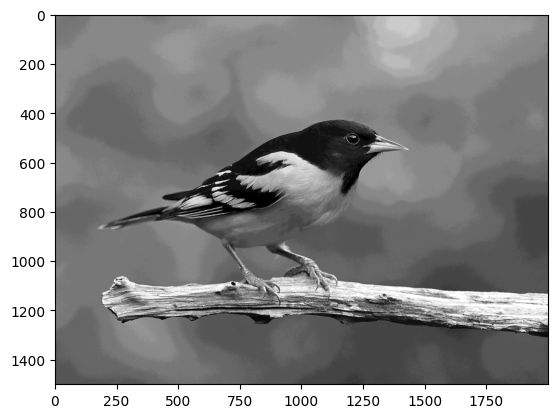

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread("bird.png" , mode='F').astype(np.uint8)
c1 = data & 0xF0
iio.imsave('birdf0.png', c1)
tmp = iio.imread('birdf0.png')
plt.imshow(tmp, cmap='gray')
plt.show()



2.4 Màu sắc với hệ RGB

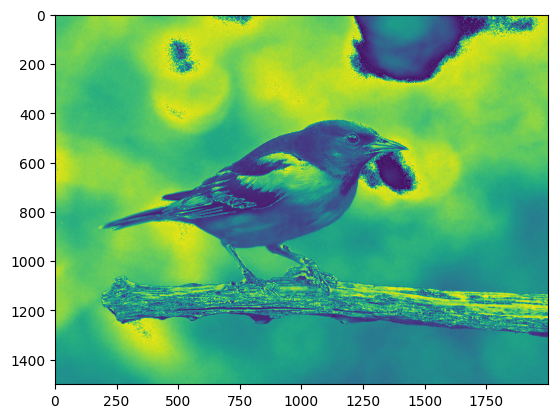

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread("bird.png")
bdata = (data[:,:,1]+ data[:,:,2])
plt.imshow(bdata)
plt.show()


2.5 Màu sắc với hệ HSV

In [13]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)  
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.rgb_to_hsv(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(0.6666666666666666, 0.996078431372549, 255)


2.6 Ứng dụng chuyển đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


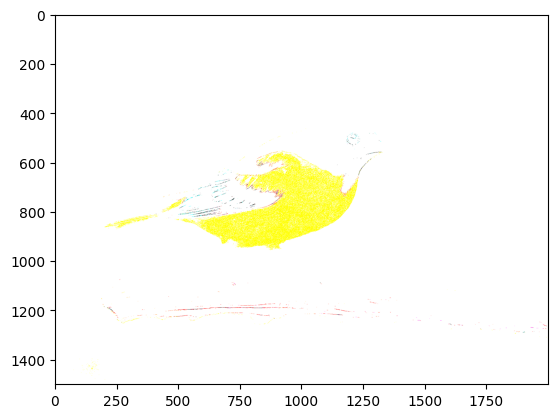

In [15]:
import numpy as np
import imageio.v2 as iio
import colorsys
import matplotlib.pyplot as plt

rgb = iio.imread("bird.png")
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()



2.7 Lọc ảnh

Lọc ảnh với mean filter

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


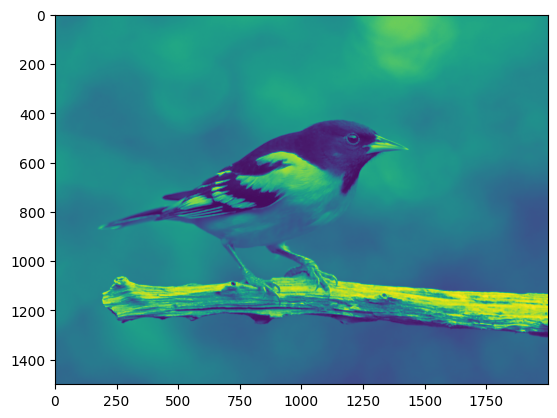

In [16]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys
import scipy.ndimage as sn

a = iio.imread("bird.png", mode='F')

k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('bird_mean_filter.png', b)
print(b)
plt.imshow(b)
plt.show()

Lọc ảnh với median filter

[[118 118 118 ... 131 131 131]
 [118 118 119 ... 131 131 131]
 [119 119 119 ... 132 131 131]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  80  81  81]
 [ 89  88  89 ...  80  80  81]]


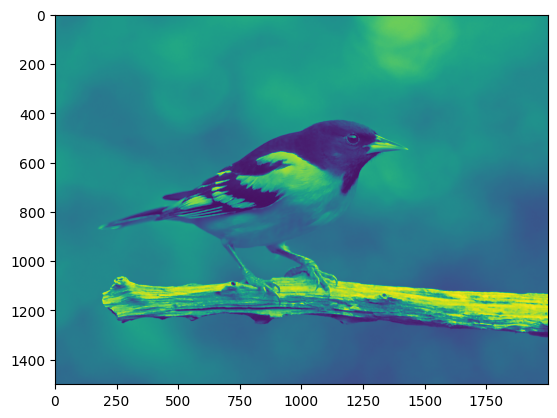

In [17]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F').astype(np.uint8)

b = sn.median_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_median_filter.png', b)
print(b)
plt.imshow(b)
plt.show()



Lọc ảnh với Max filter

[[121 121 121 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 ...
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]]


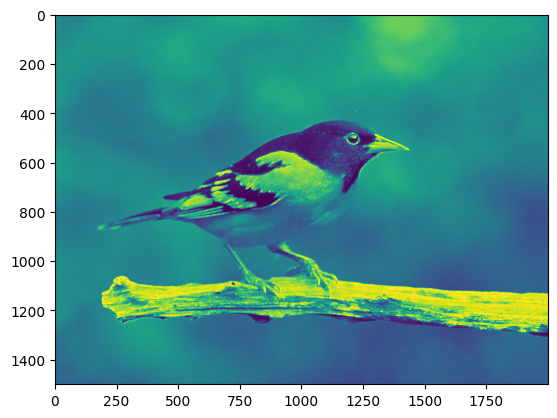

In [18]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F').astype(np.uint8)
b = sn.maximum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_maximum_filter.png', b)
print(b)
plt.imshow(b)
plt.show()

Lọc ảnh với Min filter

[[117 117 117 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 ...
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  78  78  78]]


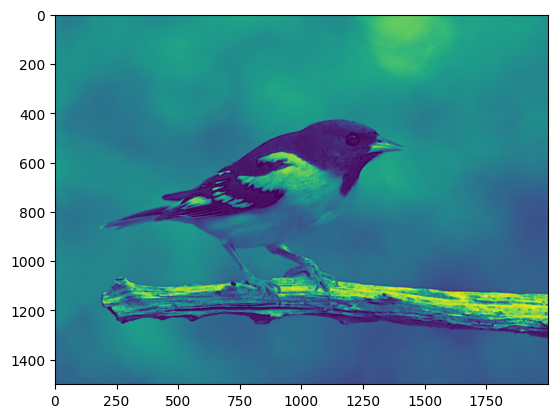

In [19]:
import numpy as np
import imageio.v2 as iio
import colorsys
import matplotlib.pyplot as plt
import scipy.ndimage as sn
a = iio.imread("bird.png", mode='F').astype(np.uint8)
b = sn.minimum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_minimum_filter.png', b)
print(b)
plt.imshow(b)
plt.show()

2.8 Dò cạnh biên của ảnh

Sobel filter

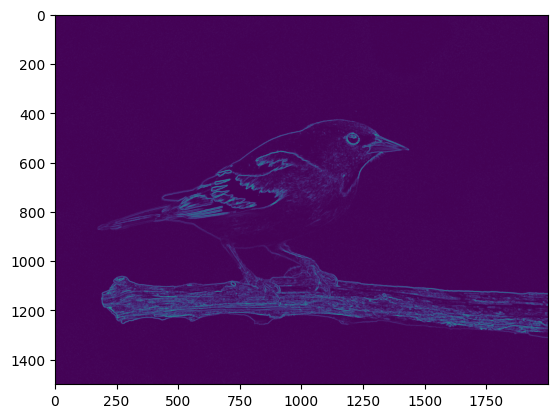

In [30]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F')
b = filters.sobel(a).astype(np.uint8)

iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

Prewott filter

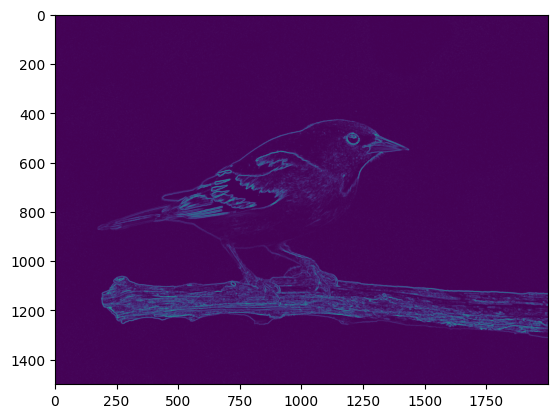

In [31]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F')
b = filters.prewitt(a).astype(np.uint8)

iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

Canny filter

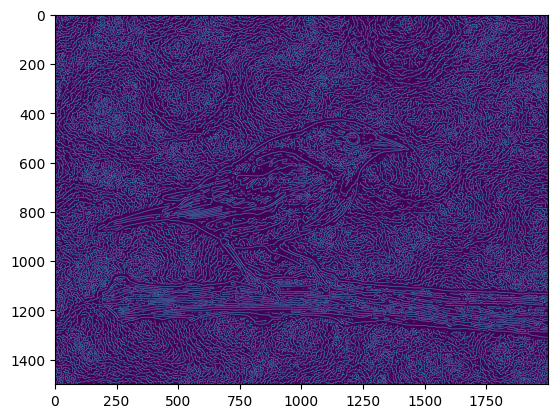

In [33]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F')
b = feature.canny(a, sigma = 3).astype(np.uint8)
iio.imsave('bird_canny_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

Laplacian detection

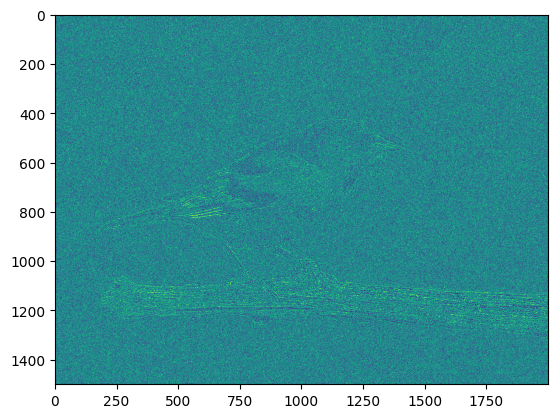

In [34]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import colorsys

a = iio.imread("bird.png", mode='F')
b = sn.laplace(a, mode='reflect').astype(np.uint8)
iio.imsave('bird_laplace_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()